In [1]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np
import PIL
from scipy.special import softmax
import tensorflow as tf
from keras.models import load_model
from keras import backend as K

def load_image(image_location):
    x = np.asarray(PIL.Image.open(image_location))
    x = x.reshape(28,28)
    x = x.reshape(1, 28, 28, 1)
    x = x.astype('float32')
    x /= 255
    return x

model = load_model('/Users/zetong/cnn.h5')
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


# define the loss

7


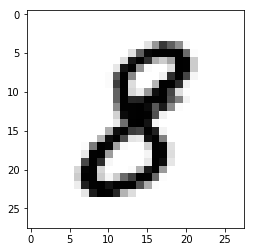

In [14]:
x_new = tf.Variable(np.random.rand(1,28,28,1), dtype=tf.float32)
logits = model(x_new)
target = 7
k = 0
c = 10
x = load_image('/Users/zetong/mnist_png/testing/8/110.png')
nontarget_logits = newlogits = tf.concat([logits[0][0:target], logits[0][target:-1]], 0)
loss = tf.norm(x_new-x)**2 + c*tf.math.maximum(tf.math.reduce_max(nontarget_logits) - logits[0][target], -k)
train = tf.train.AdamOptimizer(1).minimize(loss, var_list=[x_new])
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        #print(sess.run(loss))
        sess.run(train)
        new_img = sess.run(x_new)
        #print(np.argmax(model.predict(new_img)))
    plt.imshow(new_img.reshape((28,28)), cmap='Greys')
    print(np.argmax(model.predict(new_img)))